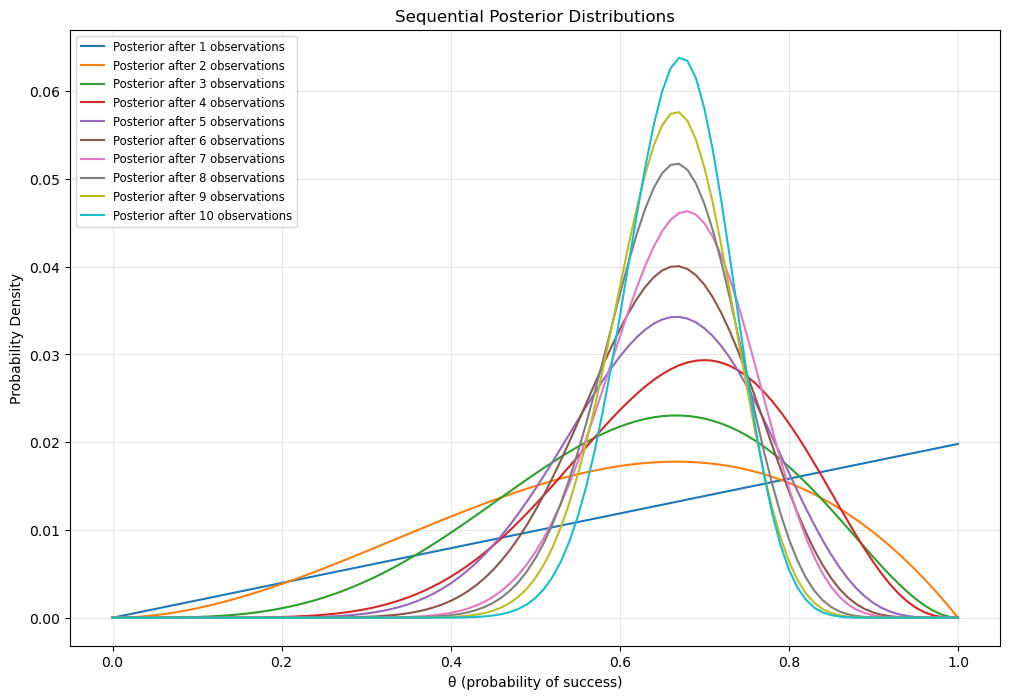

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the discrete uniform prior
theta_values = np.linspace(0, 1, 101)  # θ = 0, 0.01, ..., 1
prior = np.ones_like(theta_values) / len(theta_values)  # Uniform distribution

# Define the likelihood function
def likelihood(theta, n, x):
    return (theta**x) * ((1 - theta)**(n - x))

# Update the posterior sequentially
def sequential_update(data, prior):
    """
    Updates the posterior sequentially for a given dataset.
    Args:
    data: List of observed successes (e.g., [1, 0, 1, ...])
    prior: Initial prior distribution
    Returns:
    List of posterior distributions after each update
    """
    posteriors = []
    current_prior = prior.copy()
    
    for i, observation in enumerate(data):
        n = i + 1
        x = sum(data[:n])
        likelihood_vals = likelihood(theta_values, n, x)
        posterior_unnormalized = likelihood_vals * current_prior
        posterior_normalized = posterior_unnormalized / posterior_unnormalized.sum()
        posteriors.append(posterior_normalized)
        current_prior = posterior_normalized  
    
    return posteriors

# Simulate observations (1=success, 0=failure)
observations = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

# Compute the sequential posteriors
posteriors = sequential_update(observations, prior)

# Plot the sequential posteriors
plt.figure(figsize=(12, 8))
for i, posterior in enumerate(posteriors):
    plt.plot(theta_values, posterior, label=f"Posterior after {i+1} observations")
plt.xlabel("θ (probability of success)")
plt.ylabel("Probability Density")
plt.title("Sequential Posterior Distributions")
plt.legend(loc="upper left", fontsize="small")
plt.grid(alpha=0.3)
plt.show()

